In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('C:\\Users\\Amit Dhiman\\Downloads\\HRDataset_v14.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Data Cleaning

In [74]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [75]:
df.duplicated().sum()

0

In [76]:
# checking inconsistencies in data
print(df['Sex'].unique())
print(df['Department'].unique())
print(df['RaceDesc'].unique())

['M ' 'F']
['Production       ' 'IT/IS' 'Software Engineering' 'Admin Offices'
 'Sales' 'Executive Office']
['White' 'Black or African American' 'Two or more races' 'Asian'
 'American Indian or Alaska Native' 'Hispanic']


In [77]:
df['Sex'] = df['Sex'].str.strip().str.title()
df['Department'] = df['Department'].str.strip()

In [78]:
#looking for relevant details associated with null values of ManagerID

df[df['ManagerID'].isnull()][['Employee_Name', 'Position', 'Department', 'ManagerName']]

,Employee_Name,Position,Department,ManagerName
19,"Becker, Scott",Production Technician I,Production,Webster Butler
30,"Buccheri, Joseph",Production Technician II,Production,Webster Butler
44,"Chang, Donovan E",Production Technician I,Production,Webster Butler
88,"Fancett, Nicole",Production Technician II,Production,Webster Butler
135,"Hutter, Rosalie",Production Technician II,Production,Webster Butler
177,"Manchester, Robyn",Production Technician II,Production,Webster Butler
232,"Rivera, Haley",Production Technician I,Production,Webster Butler
251,"Sewkumar, Nori",Production Technician I,Production,Webster Butler


In [79]:
#As all null values has common Manager, finding it's Manager ID to replace it with null values

df[df['ManagerName'] == 'Webster Butler']['ManagerID']

4      39.0
19      NaN
30      NaN
44      NaN
65     39.0
88      NaN
89     39.0
105    39.0
124    39.0
135     NaN
151    39.0
174    39.0
177     NaN
198    39.0
206    39.0
214    39.0
232     NaN
251     NaN
276    39.0
280    39.0
300    39.0
Name: ManagerID, dtype: float64

In [80]:
# replacing null values of ManagerID with 39.0 as shown above

df['ManagerID'] = df['ManagerID'].fillna(39.0)

In [85]:
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y', errors='raise') #changing dtype of DOB

# Categorical Analysis

### Active vs Terminated Employees

C:\Users\Amit Dhiman\AppData\Local\Temp\ipykernel_6592\1140850537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( data= df, x = 'EmploymentStatus', palette='Set2')


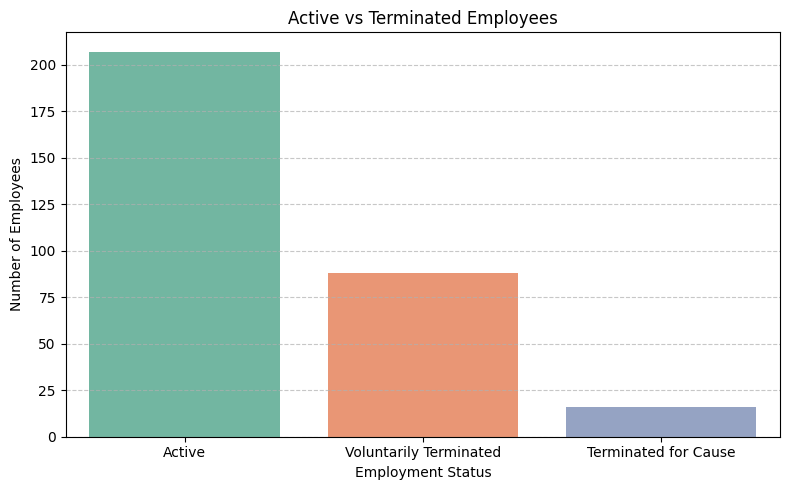

In [13]:
plt.figure(figsize=(8,5))

sns.countplot( data= df, x = 'EmploymentStatus', palette='Set2')
plt.title('Active vs Terminated Employees')
plt.xlabel('Employment Status')
plt.ylabel('Number of Employees')
plt.grid(True, axis= 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

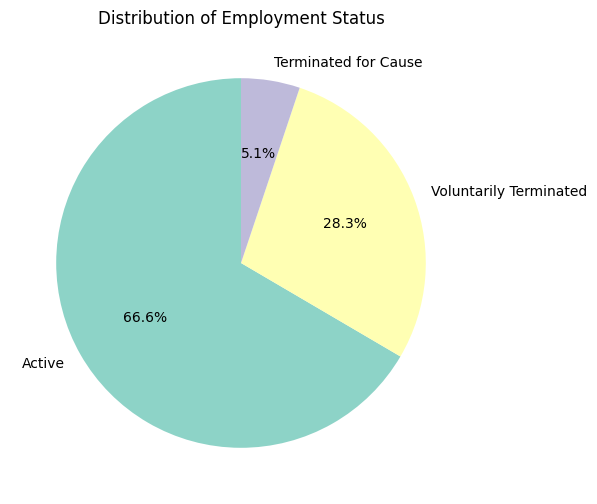

In [14]:
df['EmploymentStatus'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette('Set3'), 
    figsize=(6, 6)
)
plt.title('Distribution of Employment Status')
plt.ylabel('')
plt.show()

## Attrition Overview

- The dataset contains both Active and Terminated employees.

- A significant number of employees (1/3rd) have left the organization.

- Understanding their traits helps target retention strategies.

### Gender-Wise Employment Status Distribution

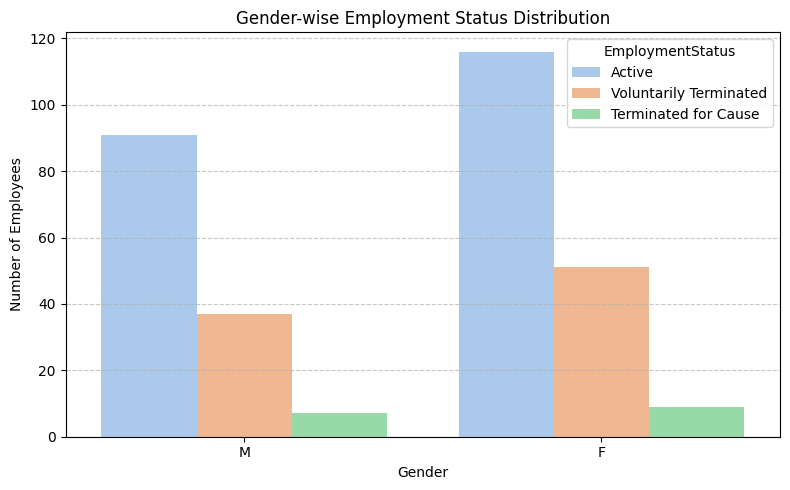

In [17]:
plt.figure(figsize=(8,5))

sns.countplot(data = df, x = 'Sex', hue= 'EmploymentStatus', palette='pastel')
plt.title('Gender-wise Employment Status Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.grid(axis= 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

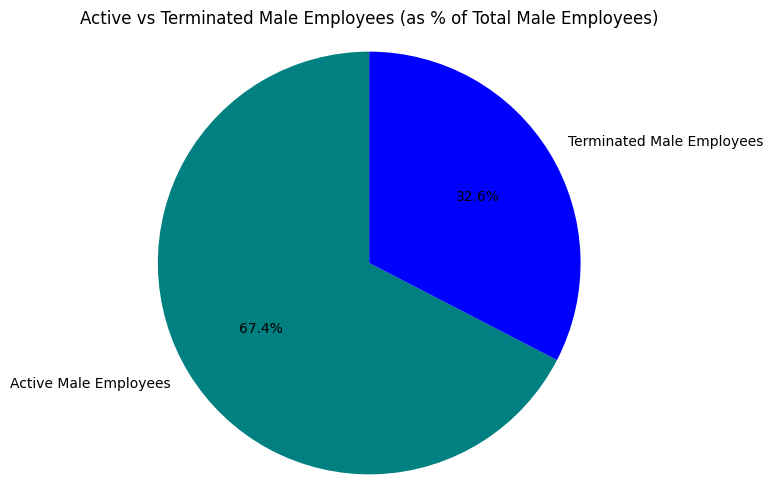

In [147]:
# Visualizing Male data
total_M = (df['Sex'] == 'M').sum()

non_active_M = ((df['Sex'] == 'M') & (df['EmploymentStatus'].isin(['Voluntarily Terminated', 'Terminated for Cause']))).sum()

active_M = total_M - non_active_M

percentages_M = [active_M/total_M*100, non_active_M/total_M*100]

labels_M = ['Active Male Employees', 'Terminated Male Employees']
sizes_M = [active_M, non_active_M]

plt.figure(figsize=(6,6))
plt.pie(percentages_M, labels=labels_M, autopct='%.1f%%', startangle=90, colors=['teal', 'blue'])
plt.title('Active vs Terminated Male Employees (as % of Total Male Employees)')
plt.axis('equal') #equal aspect ration to make pie chart a circle
plt.show()

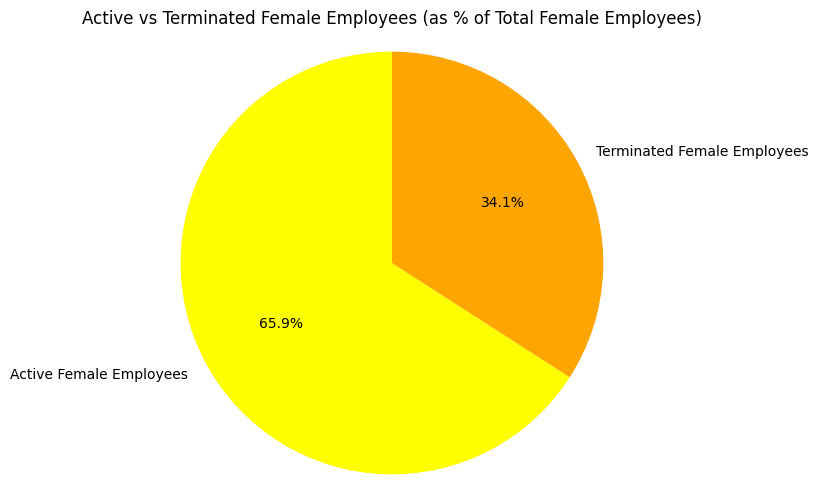

In [146]:
# Visualizing Female Data
total_F = (df['Sex'] == 'F').sum()

non_active_F = ((df['Sex'] == 'F') & (df['EmploymentStatus'].isin(['Voluntarily Terminated', 'Terminated for Cause']))).sum()

active_F = total_F - non_active_F

percentages_F = [active_F/total_F*100, non_active_F/total_F*100]

labels_F = ['Active Female Employees', 'Terminated Female Employees']
sizes_F = [active_F, non_active_F]

plt.figure(figsize=(6,6))
plt.pie(percentages_F, labels=labels_F, autopct='%.1f%%', startangle=90, colors=['yellow', 'orange'])
plt.title('Active vs Terminated Female Employees (as % of Total Female Employees)')
plt.axis('equal') #equal aspect ration to make pie chart a circle
plt.show()

## Insights
- Females form a larger portion of the workforce.
- **Termination patterns are balanced across genders** — no strong gender-specific attrition trend observed.

### Attrition by Marital Status

In [26]:
df['MaritalDesc'] = df['MaritalDesc'].str.strip().str.title()

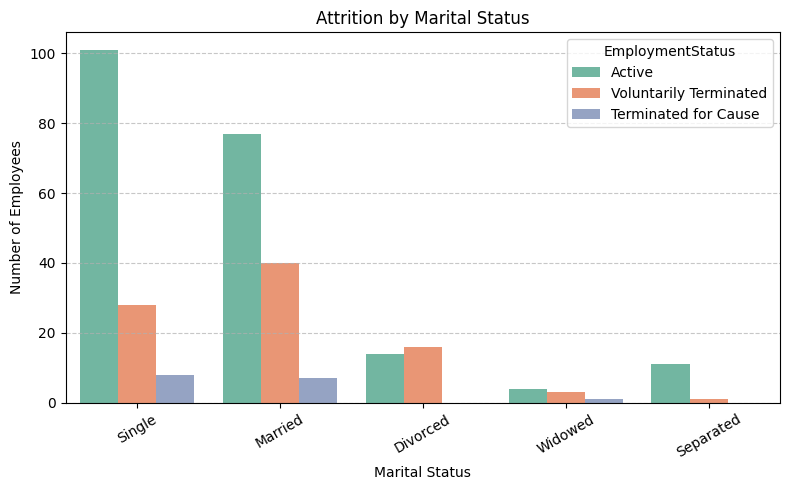

In [27]:
plt.figure(figsize=(8,5))

sns.countplot(data = df, x = 'MaritalDesc', hue= 'EmploymentStatus', palette='Set2')
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.xticks(rotation=30)
plt.grid(axis= 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

## Insights
- **Married and Divorced employees** show higher termination rates compared to Single employees.
- Termination in Divorced employees exceeds Active Divorced employees.

### Attrition by Department

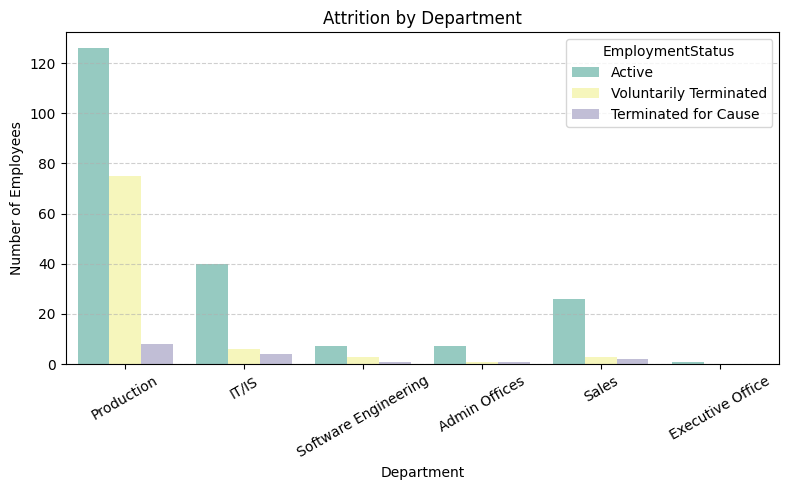

In [28]:
plt.figure(figsize=(8,5))

sns.countplot(data = df, x = 'Department', hue= 'EmploymentStatus', palette='Set3')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=30)
plt.grid(axis= 'y', linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

## Insights
- **Production and IT/IS departments** have the highest number of terminated employees.
- May require closer analysis of job conditions, pressure, or satisfaction in those departments.

# Numerical Analysis

### Age vs Attrition

In [93]:
# Calculating Age from DOB

from datetime import datetime

today = pd.to_datetime('today')

# Fix: If DOB is in future (e.g., year > today), subtract 100 years
df.loc[df['DOB'] > today, 'DOB'] = df.loc[df['DOB'] > today, 'DOB'] - pd.DateOffset(years=100)

df['Age'] = df['DOB'].apply(
    lambda dob: (today.year - dob.year) - ((today.month, today.day) < (dob.month, dob.day)) if pd.notnull(dob) else None
)

C:\Users\Amit Dhiman\AppData\Local\Temp\ipykernel_6592\684450808.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




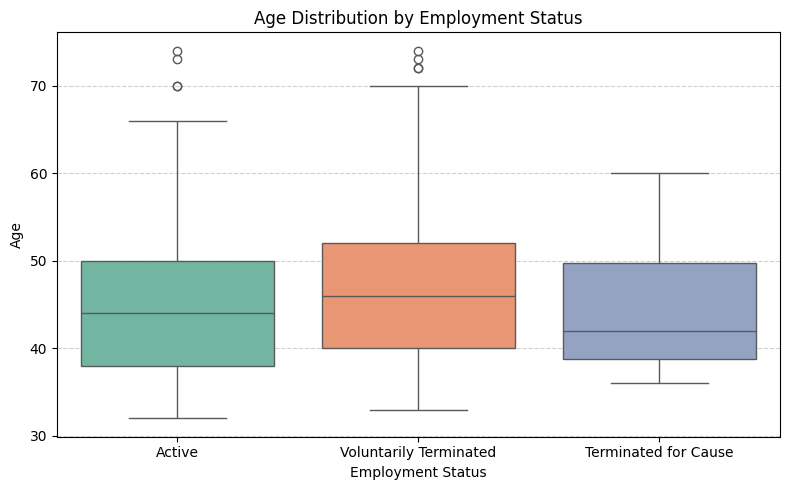

In [95]:
plt.figure(figsize=(8,5))

sns.boxplot(data = df, x = 'EmploymentStatus', y = 'Age', palette='Set2')
plt.title('Age Distribution by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Age')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\Amit Dhiman\AppData\Local\Temp\ipykernel_6592\3162739393.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




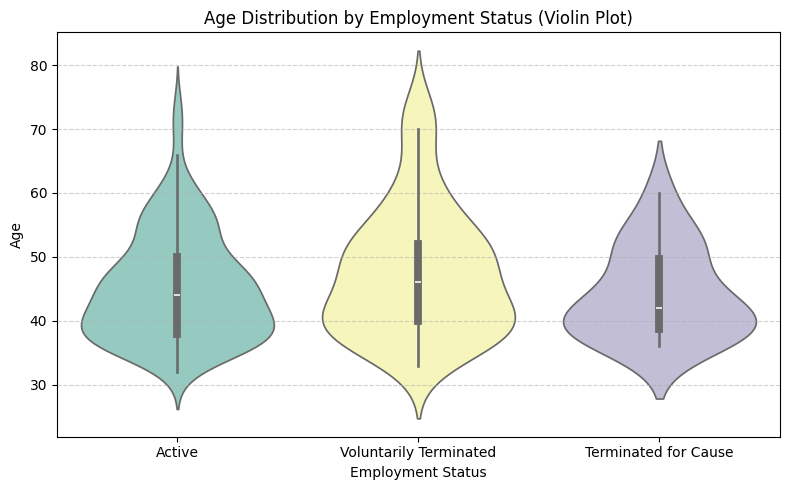

In [96]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='EmploymentStatus', y='Age', palette='Set3')
plt.title('Age Distribution by Employment Status (Violin Plot)')
plt.xlabel('Employment Status')
plt.ylabel('Age')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Income vs Attrition

C:\Users\Amit Dhiman\AppData\Local\Temp\ipykernel_6592\3038031628.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




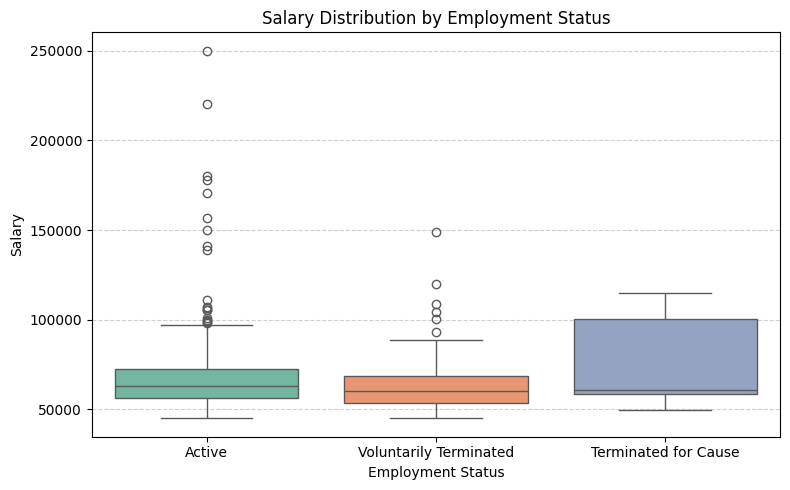

In [100]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x = 'EmploymentStatus', y = 'Salary', palette='Set2')
plt.title('Salary Distribution by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Salary')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Insights
- Median salary of **terminated employees is lower**.
- Indicates that lower-paid staff are more likely to leave — points to compensation-related attrition.

### EmpSatisfaction scores of Active vs Terminated employees

C:\Users\Amit Dhiman\AppData\Local\Temp\ipykernel_6592\3973536459.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




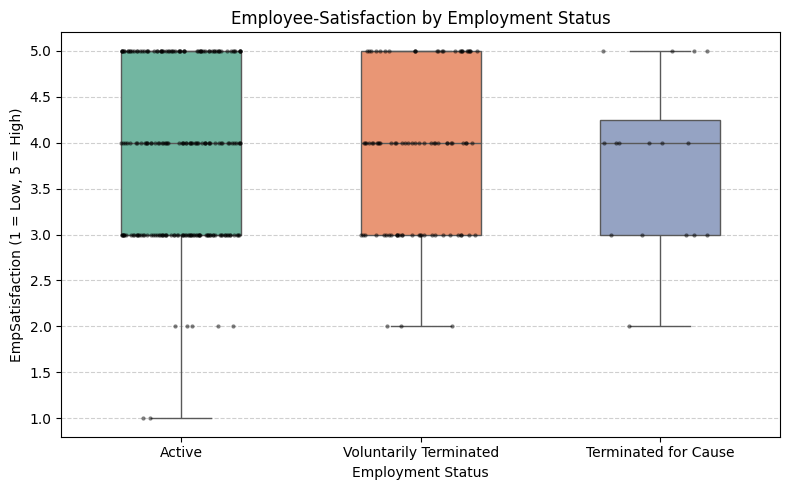

In [102]:
plt.figure(figsize=(8,5))
sns.boxplot(data = df, x = 'EmploymentStatus', y = 'EmpSatisfaction', palette='Set2', width=0.5, showfliers=False)
sns.stripplot(data=df, x = 'EmploymentStatus', y = 'EmpSatisfaction', jitter=0.25, color='black', alpha=0.5, size=3)
plt.title('Employee‑Satisfaction by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('EmpSatisfaction (1 = Low, 5 = High)')
plt.grid(axis='y', linestyle='--', alpha=.6)
plt.tight_layout()
plt.show()

## Insights
- All employees -Active and Terminated, have same median satisfaction score

### Engagement Survey by Employment Status

C:\Users\Amit Dhiman\AppData\Local\Temp\ipykernel_6592\2501120379.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




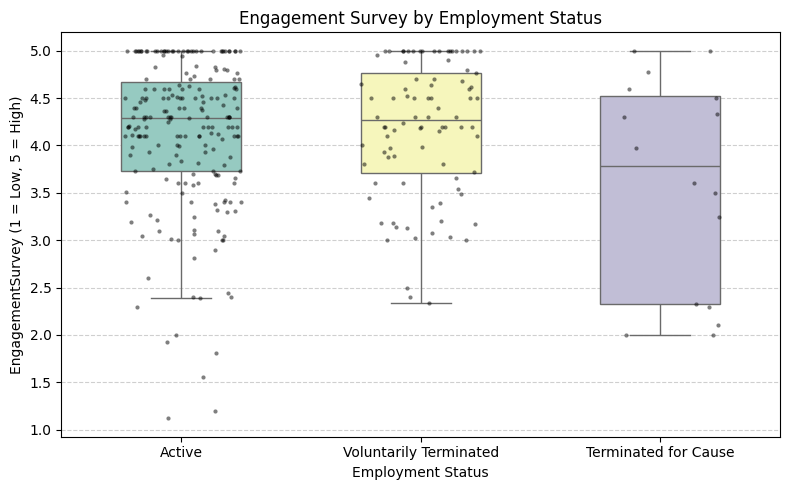

In [108]:
plt.figure(figsize=(8,5))
sns.boxplot(data = df, x = 'EmploymentStatus', y = 'EngagementSurvey', palette='Set3', width=0.5, showfliers=False)
sns.stripplot(data=df, x = 'EmploymentStatus', y = 'EngagementSurvey', jitter=0.25, color='black', alpha=0.5, size=3)
plt.title('Engagement Survey by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('EngagementSurvey (1 = Low, 5 = High)')
plt.grid(axis='y', linestyle='--', alpha=.6)
plt.tight_layout()
plt.show()

### Performance vs Employment Status

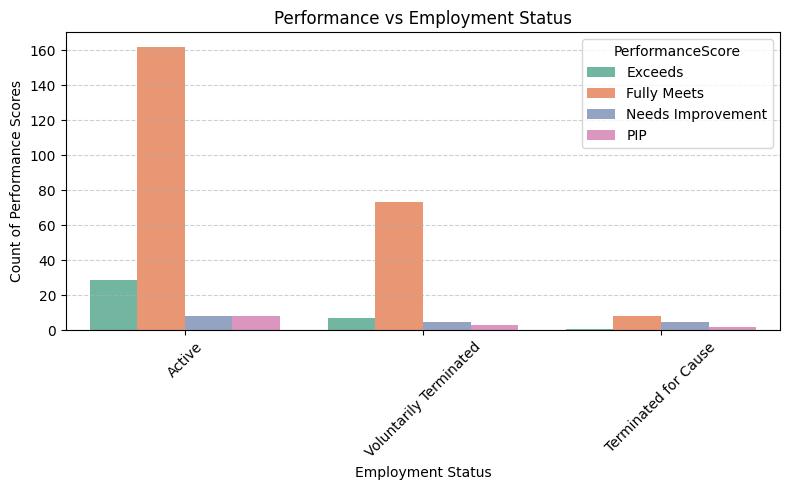

In [112]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x = 'EmploymentStatus', hue='PerformanceScore', palette='Set2')

plt.title('Performance vs Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count of Performance Scores')
plt.xticks(rotation=45)
plt.grid(axis= 'y', linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

## Insights
- Employees with **low or average performance** dominate the terminated group.

- **Top performers mostly stay**, which is a good sign — but retention of mid-tier employees should be studied.

# Categorical Analysis

### Correlation between various features

In [114]:
num_cols = ['Age', 'Salary', 'EngagementSurvey', 'EmpSatisfaction',
            'SpecialProjectsCount', 'DaysLateLast30', 'Absences']

df_corr = df[num_cols]

In [116]:
corr_matrix = df_corr.corr()

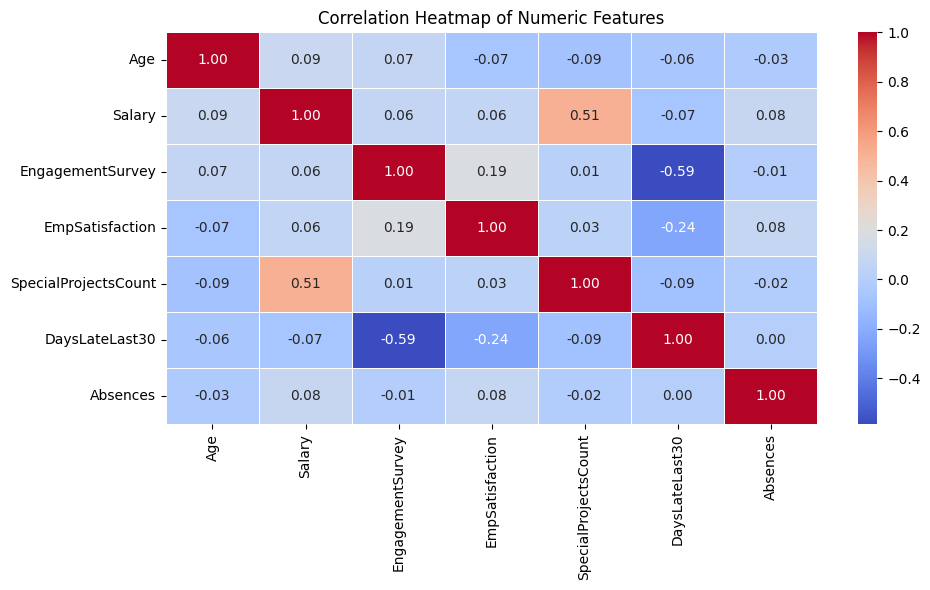

In [118]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

## Correlation Insights

| Relationship               | Correlation | Insight                                                                                  |
| -------------------------- | ----------- | ---------------------------------------------------------------------------------------- |
| Engagement vs Satisfaction | **+0.19**   | Highly engaged employees are more satisfied. Reinforce engagement to boost satisfaction. |
| Age vs Salary              | **+0.09**   | Older employees earn more, showing typical career progression.                           |
| Engagement vs Absences     | **−0.01**   | Disengaged employees are more likely to be absent. Red flags for HR.                     |
| Satisfaction vs Absences   | **+0.08**   | Dissatisfaction links with higher absenteeism.                                           |
| Special Projects vs Salary | **+0.03**   | Employees trusted with more projects tend to be paid more.                               |

## Actionable Business Recommendations

📌 Improve engagement in high-attrition departments (IT/IS, Production).

📌 Survey and address concerns of low-satisfaction employees.

📌 Review compensation structure for roles with low median salaries and high attrition.

📌 Retain top and mid-tier performers with growth plans, recognition, and better alignment.

📌 Track early warning signs like absenteeism and low engagement — develop manager alerts.